## IPL - Analysis & Predictions

In this project, two databases has been used for the total analysis. One database is containing the details of every player about their performance in the IPL and the other database is containg the details of every matches played, its venue and its location.After merging the two databases, few prediction are made. 

### Table of Content

* Importing the Relevant Libraries
* Importing the Dataset
* Data Inspection
* Exploratory Data Analysis
* Making a Prediction
* Predicting the Error

#### Regular EDS and plotting Libraries

In [130]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Importing the datasets

In [131]:
pwd()

'C:\\Users\\Debjit\\Desktop\\Decodr Data Science Course\\Projects\\Project 4 - IPL  Predictions'

In [132]:
ipl1 = pd.read_csv('IPL-matches-dataset.csv')

In [133]:
ipl2 = pd.read_csv('IPL-dataset-deliveries.csv')

#### Loading the datasets

In [134]:
# Having a glance at the first dataset
ipl1.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [135]:
# Having a glance at the second dataset
ipl2.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [136]:
# Looking at the number of rows and columns in the datasets
ipl1.shape

(756, 18)

In [137]:
ipl2.shape

(179078, 21)

#### Getting the header names of the columns of the both the datasets

In [138]:
ipl1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [139]:
ipl2.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [140]:
# Getting the frequency of most man of the match awards
ipl1['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
AP Tare            1
K Paul             1
Umar Gul           1
YS Chahal          1
M Ur Rahman        1
Name: player_of_match, Length: 226, dtype: int64

In [141]:
# Top 10 players with man of the match awards
ipl1['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [142]:
ipl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [143]:
##checking for missing values

ipl2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [144]:
batsman = ipl2.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name="runs")

In [145]:
top_batsman = batsman.sort_values(by='runs', ascending=False)[:10]
top_batsman

,batsman,runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


Text(0.5, 1.0, 'Top 10 Batsman in IPL')

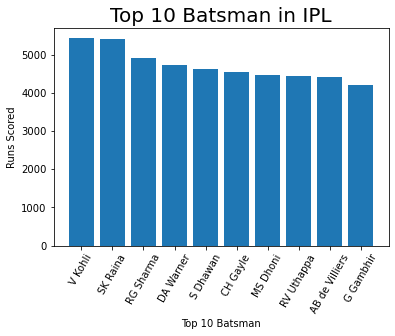

In [146]:
##plotting the batsmen and the runs scored by them

plt.bar(top_batsman['batsman'], top_batsman['runs'])
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsman',size=10)
plt.ylabel('Runs Scored',size=10)
plt.title('Top 10 Batsman in IPL',size=20)

In [30]:
# Getting the frequency of the rsult column
ipl1['result'].value_counts()


normal       743
tie            9
no result      4
Name: result, dtype: int64

In [33]:
# Finding out the number of Toss wins w.r.t. each teams
ipl1['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [148]:
# Extracting the records where a team won batting first
batting_first = ipl1[ipl1['win_by_runs']!=0]


In [149]:
# Top 5 teams who won by batting first
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


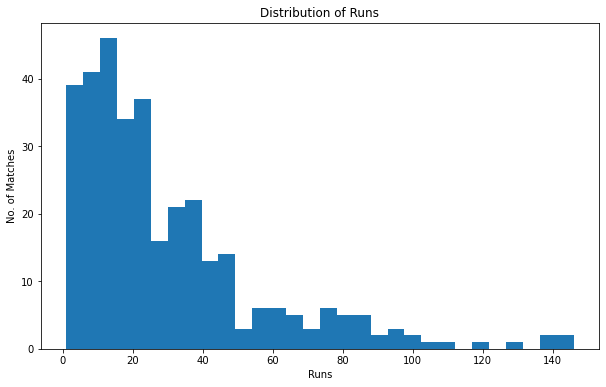

In [151]:
# Making a Histogram

plt.figure(figsize=(10,6))
plt.hist(batting_first['win_by_runs'],bins=30)
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('No. of Matches')
plt.show()

In [36]:
# Extracting the record where the team won batting second
batting_second = ipl1[ipl1['win_by_wickets']!=0]

In [37]:
# Top 5 teams who won by batting second
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [47]:
# Finding out the number of wins w.r.t each teams after batting first

batting_first['winner'].value_counts().keys()

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Delhi Daredevils',
       'Deccan Chargers', 'Pune Warriors', 'Rising Pune Supergiant',
       'Delhi Capitals', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Gujarat Lions'],
      dtype='object')

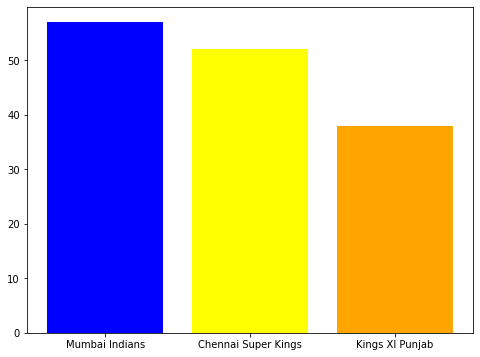

In [57]:
# Making a bar-plot for Top 3 teams with most number of wins after batting first

plt.figure(figsize=(8,6))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]), color=['blue','yellow','orange'])
plt.show()   

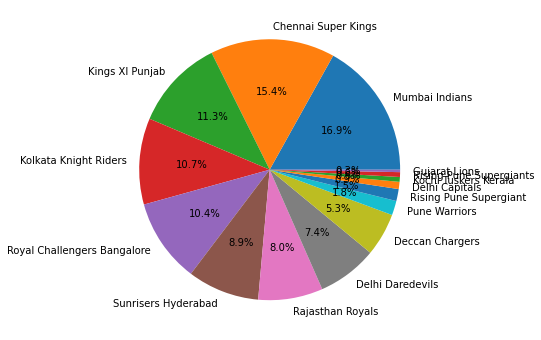

In [58]:
# Making a pie-chart

plt.figure(figsize=(8,6))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

C:\Users\Debjit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


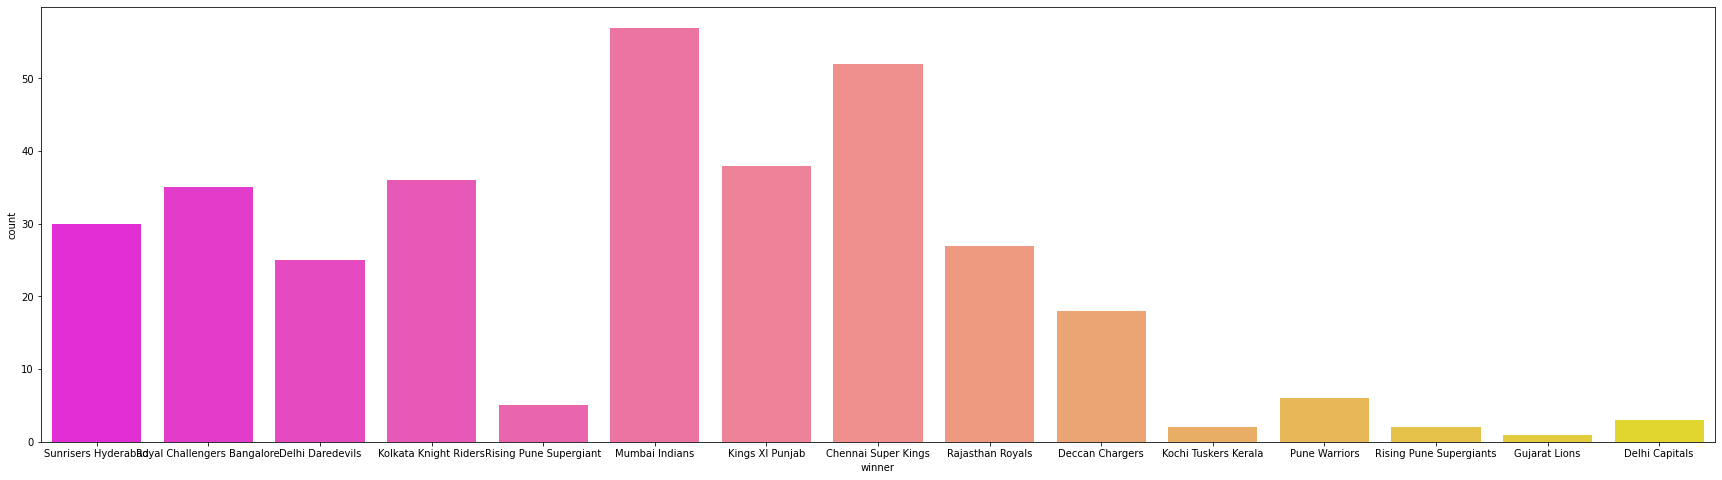

In [61]:
# Making another figure for the all the team showing the percentage of wins

plt.figure(figsize=(30,8))
sns.countplot(batting_first['winner'],data=ipl1,palette='spring');

#### Cleaning the data

In [72]:
df = ipl1[['team1','team2','toss_decision','toss_winner','winner']]
df.dropna(inplace=True);

<ipython-input-72-3138c1fad083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True);


In [73]:
df

,team1,team2,toss_decision,toss_winner,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,field,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,field,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,field,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,bat,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,bat,Chennai Super Kings,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,field,Delhi Capitals,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,field,Chennai Super Kings,Chennai Super Kings


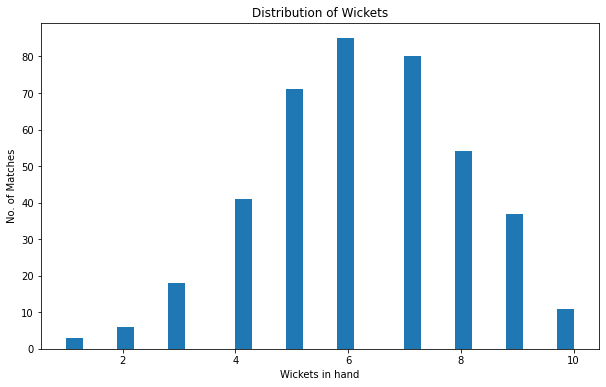

In [115]:
# Making a Histogram

plt.figure(figsize=(10,6))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.title('Distribution of Wickets')
plt.xlabel('Wickets in hand')
plt.ylabel('No. of Matches')
plt.show()

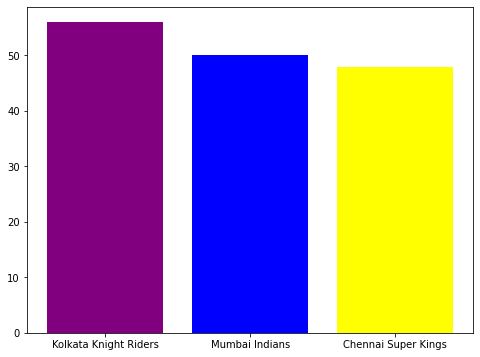

In [127]:
# Making a bar-plot for the Top 3 teams with most number of wins batting second

plt.figure(figsize=(8,6))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=['purple','blue','yellow'])
plt.show()

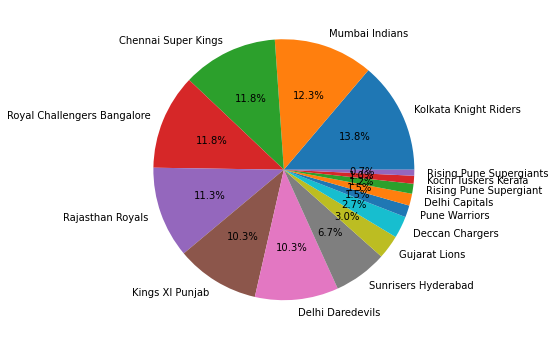

In [128]:
# Making a pie chart for the distribution of most wins after batting second

plt.figure(figsize=(8,6))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [130]:
# Looking at the number of matches played each season

ipl1['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

In [131]:
# Looking at the number of matches played in each cities

ipl1['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Ranchi              7
Abu Dhabi           7
Cape Town           7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [45]:
# Calculating the 4's & 6's of the batsmen

##fours and sixes
fours = ipl2[ ipl2["batsman_runs"] == 4]
sixes = ipl2[ ipl2["batsman_runs"] == 6]

fours_by_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_by_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

In [46]:
fours_by_batsman

,match_id,inning,batsman,batsman_runs
0,1,1,DA Warner,2
1,1,1,MC Henriques,3
2,1,1,S Dhawan,5
3,1,1,Yuvraj Singh,7
4,1,2,CH Gayle,2
...,...,...,...,...
6922,11415,1,KA Pollard,3
6923,11415,1,RG Sharma,1
6924,11415,2,F du Plessis,3
6925,11415,2,RA Jadeja,1


### Predicting the Score of a Team

In [58]:
batsman_grp = ipl2.groupby(['match_id', 'inning', 'batting_team', 'batsman'])
batsmen = batsman_grp['batsman_runs'].sum().reset_index()
batsmen

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,1,1,Sunrisers Hyderabad,DA Warner,14
2,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,1,1,Sunrisers Hyderabad,MC Henriques,52
4,1,1,Sunrisers Hyderabad,S Dhawan,40
...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2
11331,11415,2,Chennai Super Kings,RA Jadeja,9
11332,11415,2,Chennai Super Kings,SK Raina,9
11333,11415,2,Chennai Super Kings,SN Thakur,2


In [66]:
## ignoring the wide balls.

balls_faced = ipl2[ipl2["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"],
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,4s_x,6s_x,4s_y,6s_y,balls_faced
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,NaN,2.0,NaN,2.0,6.0
1,1,1,Sunrisers Hyderabad,DA Warner,14,2.0,1.0,2.0,1.0,8.0
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,NaN,1.0,NaN,1.0,12.0
3,1,1,Sunrisers Hyderabad,MC Henriques,52,3.0,2.0,3.0,2.0,37.0
4,1,1,Sunrisers Hyderabad,S Dhawan,40,5.0,NaN,5.0,NaN,31.0
...,...,...,...,...,...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2,NaN,NaN,NaN,NaN,8.0
11331,11415,2,Chennai Super Kings,RA Jadeja,9,1.0,NaN,1.0,NaN,5.0
11332,11415,2,Chennai Super Kings,SK Raina,9,NaN,NaN,NaN,NaN,14.0
11333,11415,2,Chennai Super Kings,SN Thakur,2,NaN,NaN,NaN,NaN,2.0


In [69]:
##fours and sixes
fours = ipl2[ ipl2["batsman_runs"] == 4]
sixes = ipl2[ ipl2["batsman_runs"] == 6]

fours_by_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_by_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

In [70]:
fours_by_batsman

,match_id,inning,batsman,batsman_runs
0,1,1,DA Warner,2
1,1,1,MC Henriques,3
2,1,1,S Dhawan,5
3,1,1,Yuvraj Singh,7
4,1,2,CH Gayle,2
...,...,...,...,...
6922,11415,1,KA Pollard,3
6923,11415,1,RG Sharma,1
6924,11415,2,F du Plessis,3
6925,11415,2,RA Jadeja,1


In [47]:
fours_by_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_by_batsman.columns = ["match_id", "inning", "batsman", "6s"]

In [67]:
batsmen = batsmen.merge(fours_by_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_by_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

In [71]:
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,4s_x,6s_x,4s_y,6s_y,balls_faced,4s,6s,SR
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,NaN,2.0,NaN,2.0,6.0,NaN,2.0,266.67
1,1,1,Sunrisers Hyderabad,DA Warner,14,2.0,1.0,2.0,1.0,8.0,2.0,1.0,175.00
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,NaN,1.0,NaN,1.0,12.0,NaN,1.0,133.33
3,1,1,Sunrisers Hyderabad,MC Henriques,52,3.0,2.0,3.0,2.0,37.0,3.0,2.0,140.54
4,1,1,Sunrisers Hyderabad,S Dhawan,40,5.0,NaN,5.0,NaN,31.0,5.0,NaN,129.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2,NaN,NaN,NaN,NaN,8.0,NaN,NaN,25.00
11331,11415,2,Chennai Super Kings,RA Jadeja,9,1.0,NaN,1.0,NaN,5.0,1.0,NaN,180.00
11332,11415,2,Chennai Super Kings,SK Raina,9,NaN,NaN,NaN,NaN,14.0,NaN,NaN,64.29
11333,11415,2,Chennai Super Kings,SN Thakur,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,100.00


In [72]:
na_cols = ["batsman_runs", "4s", "6s", "SR"]
for col in na_cols:
    batsmen[col] = batsmen[col].fillna(0)

In [73]:
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,4s_x,6s_x,4s_y,6s_y,balls_faced,4s,6s,SR
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,NaN,2.0,NaN,2.0,6.0,0.0,2.0,266.67
1,1,1,Sunrisers Hyderabad,DA Warner,14,2.0,1.0,2.0,1.0,8.0,2.0,1.0,175.00
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,NaN,1.0,NaN,1.0,12.0,0.0,1.0,133.33
3,1,1,Sunrisers Hyderabad,MC Henriques,52,3.0,2.0,3.0,2.0,37.0,3.0,2.0,140.54
4,1,1,Sunrisers Hyderabad,S Dhawan,40,5.0,NaN,5.0,NaN,31.0,5.0,0.0,129.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2,NaN,NaN,NaN,NaN,8.0,0.0,0.0,25.00
11331,11415,2,Chennai Super Kings,RA Jadeja,9,1.0,NaN,1.0,NaN,5.0,1.0,0.0,180.00
11332,11415,2,Chennai Super Kings,SK Raina,9,NaN,NaN,NaN,NaN,14.0,0.0,0.0,64.29
11333,11415,2,Chennai Super Kings,SN Thakur,2,NaN,NaN,NaN,NaN,2.0,0.0,0.0,100.00


In [75]:
team_score = batsmen[batsmen['batting_team'] == "Mumbai Indians"].reset_index()
team_score

,index,match_id,inning,batting_team,batsman,batsman_runs,4s_x,6s_x,4s_y,6s_y,balls_faced,4s,6s,SR
0,17,2,1,Mumbai Indians,AT Rayudu,10,NaN,NaN,NaN,NaN,12.0,0.0,0.0,83.33
1,18,2,1,Mumbai Indians,HH Pandya,35,1.0,4.0,1.0,4.0,15.0,1.0,4.0,233.33
2,19,2,1,Mumbai Indians,JC Buttler,38,3.0,3.0,3.0,3.0,19.0,3.0,3.0,200.00
3,20,2,1,Mumbai Indians,KA Pollard,27,3.0,1.0,3.0,1.0,17.0,3.0,1.0,158.82
4,21,2,1,Mumbai Indians,KH Pandya,3,NaN,NaN,NaN,NaN,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,11322,11415,1,Mumbai Indians,KH Pandya,7,NaN,NaN,NaN,NaN,7.0,0.0,0.0,100.00
1412,11323,11415,1,Mumbai Indians,MJ McClenaghan,0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.00
1413,11324,11415,1,Mumbai Indians,Q de Kock,30,NaN,4.0,NaN,4.0,17.0,0.0,4.0,176.47
1414,11325,11415,1,Mumbai Indians,RD Chahar,0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.00


In [77]:
scores = team_score.groupby(['match_id'])['batsman_runs'].sum().reset_index()
score

,match_id,batsman_runs
0,2,176
1,7,168
2,10,155
3,12,132
4,16,164
...,...,...
182,11338,198
183,11342,171
184,11347,134
185,11412,132


In [78]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['batsman']
encoder = LabelEncoder()
for ftr in ftr_list:
    team_score[ftr] = encoder.fit_transform(team_score[ftr])
    print(encoder.classes_)

team_score

['A Dananjaya' 'A Joseph' 'A Nehra' 'A Symonds' 'AC Blizzard' 'AG Murtaza'
 'AJ Finch' 'AM Nayar' 'AM Rahane' 'AN Ahmed' 'AP Tare' 'AS Yadav'
 'AT Rayudu' 'BB Sran' 'BCJ Cutting' 'BR Dunk' 'C Madan' 'C Nanda'
 'CJ Anderson' 'CJ McKay' 'CM Gautam' 'CRD Fernando' 'DJ Bravo'
 'DJ Jacobs' 'DJ Thornely' 'DR Smith' 'DS Kulkarni' 'E Lewis' 'GJ Maxwell'
 'GR Napier' 'HH Gibbs' 'HH Pandya' 'Harbhajan Singh' 'Ishan Kishan'
 'J Suchith' 'JC Buttler' 'JEC Franklin' 'JJ Bumrah' 'JP Duminy'
 'KA Pollard' 'KD Karthik' 'KH Pandya' 'KV Sharma' 'L Ronchi'
 'LMP Simmons' 'M Markande' 'M de Lange' 'MA Khote' 'MEK Hussey'
 'MG Johnson' 'MJ Guptill' 'MJ McClenaghan' 'MK Pandey' 'MM Patel'
 'Mohammad Ashraful' 'Mustafizur Rahman' 'N Rana' 'NLTC Perera'
 'NM Coulter-Nile' 'P Kumar' 'PA Patel' 'PJ Sangwan' 'PP Ojha' 'PR Shah'
 'Q de Kock' 'R Dhawan' 'R McLaren' 'R Salam' 'R Sathish' 'R Vinay Kumar'
 'RD Chahar' 'RE Levi' 'RG Sharma' 'RJ Peterson' 'RP Singh' 'RR Raje'
 'RT Ponting' 'RV Uthappa' 'S Dhawan' 'S Go

,index,match_id,inning,batting_team,batsman,batsman_runs,4s_x,6s_x,4s_y,6s_y,balls_faced,4s,6s,SR
0,17,2,1,Mumbai Indians,12,10,NaN,NaN,NaN,NaN,12.0,0.0,0.0,83.33
1,18,2,1,Mumbai Indians,31,35,1.0,4.0,1.0,4.0,15.0,1.0,4.0,233.33
2,19,2,1,Mumbai Indians,35,38,3.0,3.0,3.0,3.0,19.0,3.0,3.0,200.00
3,20,2,1,Mumbai Indians,39,27,3.0,1.0,3.0,1.0,17.0,3.0,1.0,158.82
4,21,2,1,Mumbai Indians,41,3,NaN,NaN,NaN,NaN,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,11322,11415,1,Mumbai Indians,41,7,NaN,NaN,NaN,NaN,7.0,0.0,0.0,100.00
1412,11323,11415,1,Mumbai Indians,51,0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.00
1413,11324,11415,1,Mumbai Indians,64,30,NaN,4.0,NaN,4.0,17.0,0.0,4.0,176.47
1414,11325,11415,1,Mumbai Indians,70,0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.00


In [79]:
team_score = team_score.drop(['index', 'match_id', 'inning', 'batting_team'], axis=1)

In [80]:
team_score = team_score.dropna()

In [81]:
team_score.dropna()

,batsman,batsman_runs,4s_x,6s_x,4s_y,6s_y,balls_faced,4s,6s,SR
1,31,35,1.0,4.0,1.0,4.0,15.0,1.0,4.0,233.33
2,35,38,3.0,3.0,3.0,3.0,19.0,3.0,3.0,200.00
3,39,27,3.0,1.0,3.0,1.0,17.0,3.0,1.0,158.82
5,56,34,1.0,2.0,1.0,2.0,28.0,1.0,2.0,121.43
9,31,29,3.0,2.0,3.0,2.0,11.0,3.0,2.0,263.64
...,...,...,...,...,...,...,...,...,...,...
1399,64,31,1.0,3.0,1.0,3.0,23.0,1.0,3.0,134.78
1403,33,33,2.0,1.0,2.0,1.0,31.0,2.0,1.0,106.45
1408,31,16,1.0,1.0,1.0,1.0,10.0,1.0,1.0,160.00
1410,39,41,3.0,3.0,3.0,3.0,25.0,3.0,3.0,164.00


In [82]:
team_score.isnull().sum()

batsman         0
batsman_runs    0
4s_x            0
6s_x            0
4s_y            0
6s_y            0
balls_faced     0
4s              0
6s              0
SR              0
dtype: int64

### Regression to predict Batsmen Scores

In [104]:
from sklearn.metrics import mean_squared_error

# RMSE for testing data

def rmse_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return(rmse)

In [105]:
from sklearn.model_selection import train_test_split

x = team_score[['batsman', 'balls_faced', '4s', '6s', 'SR']]
y = team_score[['batsman_runs']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.2, random_state=1)

In [106]:
print(f'Original data: {x.shape}')
print(f'Training data: {x_train.shape}')
print(f'Testing data: {x_test.shape}')
print(f'Validation data: {x_val.shape}')

Original data: (453, 5)
Training data: (289, 5)
Testing data: (91, 5)
Validation data: (73, 5)


#### Linear regression

In [114]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

print(f'LR_RMSE Score: {rmse_model(model1, x_test, y_test)}')
print(f'LR_odel Coefficients: {model1.coef_}')
print(f'LR_Intercept Values of the Model: {model1.intercept_}')

LR_RMSE Score: 3.338403780532465
LR_odel Coefficients: [[2.12842553e-03 9.05849263e-01 2.49415792e+00 4.25750450e+00
  6.35203167e-02]]
LR_Intercept Values of the Model: [-11.75174311]


In [116]:
LR_y_pred = model1.predict(x_test)

In [125]:
print(f'LR_Prediction Value of the Model: {LR_y_pred}')

LR_Prediction Value of the Model: [[ 74.35912773]
 [ 56.696784  ]
 [ 19.69459181]
 [ 17.64310977]
 [ 16.38515976]
 [ 22.02799346]
 [ 14.80686725]
 [ 48.49409667]
 [ 30.93544322]
 [ 30.54566961]
 [ 56.12568146]
 [ 55.54312008]
 [ 31.02255903]
 [ 21.1482634 ]
 [ 70.07173935]
 [ 14.21049998]
 [ 14.3565379 ]
 [ 21.5625383 ]
 [ 63.02940551]
 [ 20.57411327]
 [ 60.38408357]
 [ 33.30574072]
 [ 59.46012024]
 [ 58.22729254]
 [ 47.52348742]
 [ 44.2874229 ]
 [ 19.12072596]
 [ 31.95305564]
 [ 27.34483319]
 [ 56.91607278]
 [ 33.42458994]
 [ 79.62010472]
 [ 33.50201197]
 [ 25.00357423]
 [ 52.20481678]
 [ 53.32330075]
 [ 70.95433118]
 [ 44.07870618]
 [ 15.50600469]
 [ 38.8008912 ]
 [ 44.97843468]
 [ 15.43646963]
 [ 19.12572697]
 [ 58.94304711]
 [ 65.34426103]
 [ 60.9704543 ]
 [ 35.57883727]
 [ 37.80276212]
 [ 19.6141982 ]
 [ 42.38803443]
 [ 47.01796592]
 [ 78.71267123]
 [ 21.73472855]
 [ 35.2917557 ]
 [ 68.48589499]
 [ 56.10397599]
 [ 28.08001195]
 [ 68.85528117]
 [ 46.52054739]
 [ 29.18222368]
 [ 47.

#### Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

print(f'RF_RMSE Score: {rmse_model(model2, x_test, y_test)}')

<ipython-input-112-21e9d1fbf109>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train, y_train)


RF_RMSE Score: 3.2377546147067635


In [126]:
RF_y_pred = model2.predict(x_test)

In [127]:
print(f'RF_Prediction Value of the Model: {RF_y_pred}')

RF_Prediction Value of the Model: [69.44 55.45 21.56 16.61 18.5  21.42 17.33 46.17 30.11 31.67 59.03 54.72
 26.45 23.26 69.17 16.91 16.24 24.22 57.95 22.66 60.96 33.16 61.42 55.1
 39.95 39.63 21.63 32.11 29.09 51.29 36.96 80.05 32.43 16.19 50.06 52.74
 72.81 46.23 16.49 34.09 41.32 17.76 22.06 60.08 62.28 60.91 33.24 40.92
 21.89 44.13 53.39 70.98 24.8  34.33 66.22 56.8  24.74 67.79 46.78 30.94
 45.02 24.29 57.26 61.55 91.95 39.69 38.36 15.96 57.7  22.63 19.13 12.67
 64.96 13.04 58.36 50.45 60.27 16.38 72.47 19.41 48.1  44.1  15.52 46.96
 38.94 26.17 49.54 75.52 23.11 20.73 26.14]
